# Analysis

This module implements some methods to analyze single models for investigating possible interactions within a community. 

In [24]:
from ncmw.analysis import compute_uptake_sekretion_table, compute_fvas, sekretion_uptake_fva, jaccard_similarity_matrices
from ncmw.visualization import plot_full_fva, plot_medium_fva_range, plot_scaled_medium_growth, plot_scaled_medium_growth, uptake_sekretion_venn_diagrams, jacard_index_similarity_heatmap
from ncmw.utils import get_models

In [2]:
models = get_models(folder="snm3_models", prefix="results/default_project_name/setup/")

In [3]:
fvas = compute_fvas(models, 1.)
for model, df in zip(models, fvas):
    sol = model.optimize()
    df["flux"] = sol.fluxes

## Flux variability analysis (FVA)

FVA yields a way to investigate the possible flux values that can be obtained. This shouldn't be to large for some metabolites, which would indicate some problems within the metabolic model.

For the community the flux values of the exchange reactions are from major importance. These indicate the range of values which the model can uptake or sekrete, while still obtaining maximal growth rates. 

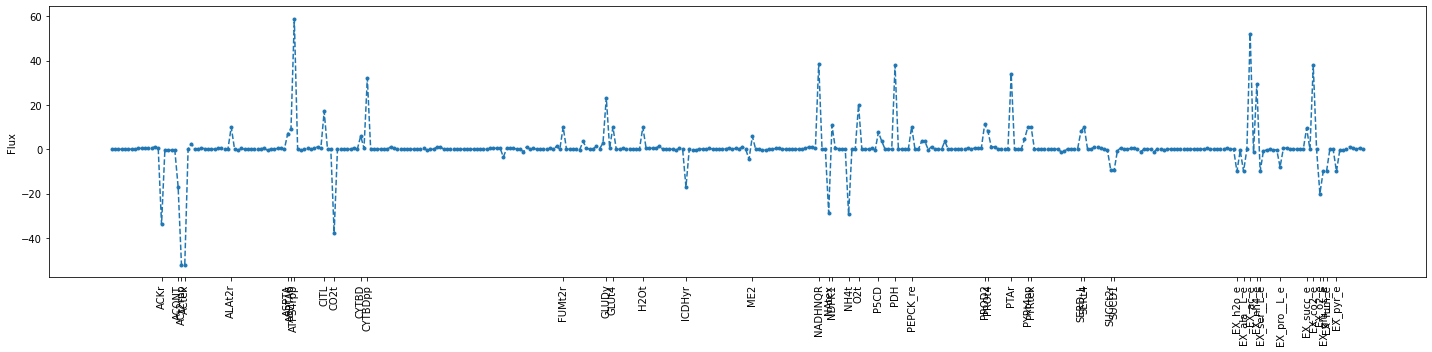

In [4]:
fig = plot_full_fva(fvas[0])

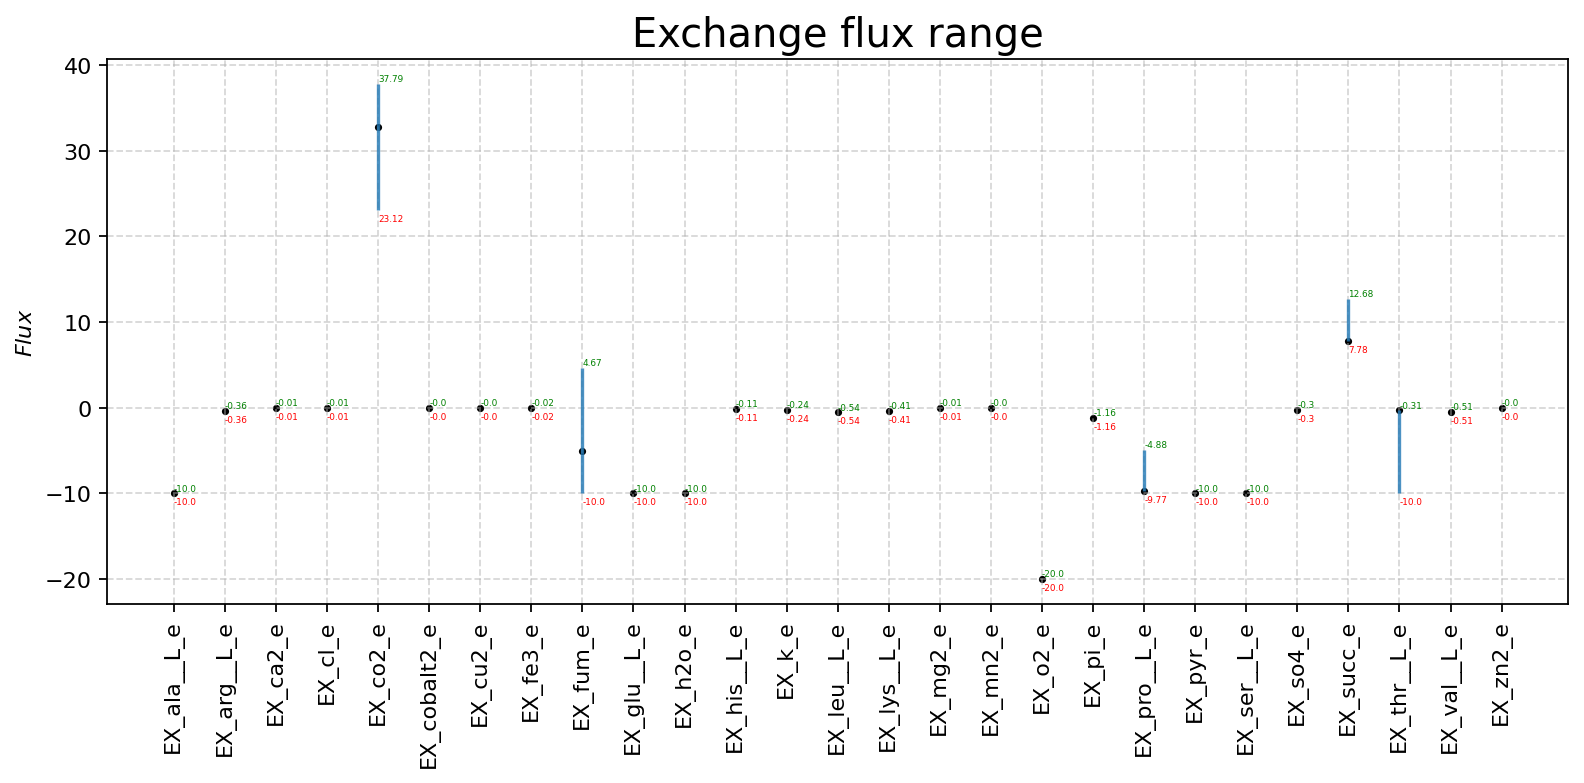

In [7]:
fig = plot_medium_fva_range(models[0])

## Growth investigateion

Different models may react differently to an increase of metabolites. Thus we are maybe interested how the growth scales with abundance of metabolites.

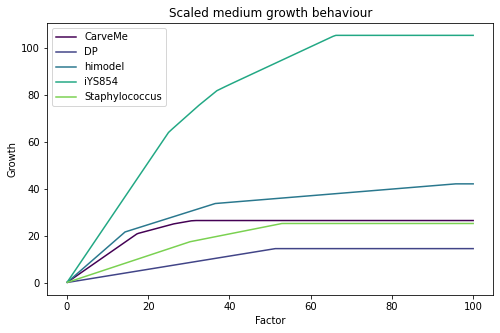

In [10]:
fig = plot_scaled_medium_growth(models)

## Uptake and sekretion reactions

A major player within a community is what a model must uptake and what it can produce. Produced metabolites can benefit other community member, to many shared uptakes can lead to competition within the communiy (Resource overlap).

In [11]:
uptakes = []
sekretions = []
for i, model in enumerate(models):
    uptake, sekretion = sekretion_uptake_fva(fvas[i])
    uptakes.append(uptake)
    sekretions.append(sekretion)

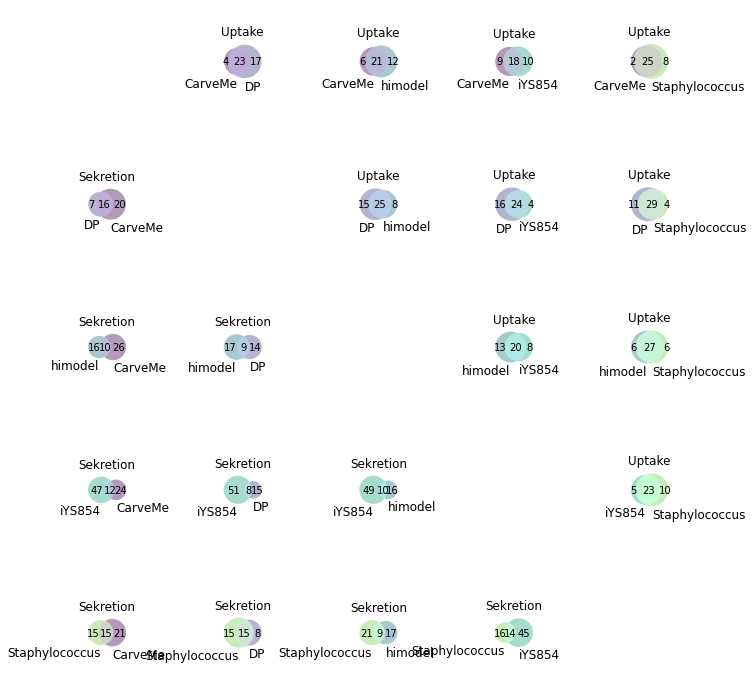

In [22]:
fig = uptake_sekretion_venn_diagrams(models, uptakes, sekretions)

/mnt/c/Users/manug/OneDrive/Uni/HIWI/ncmw/ncmw/visualization/similarity_visualization.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


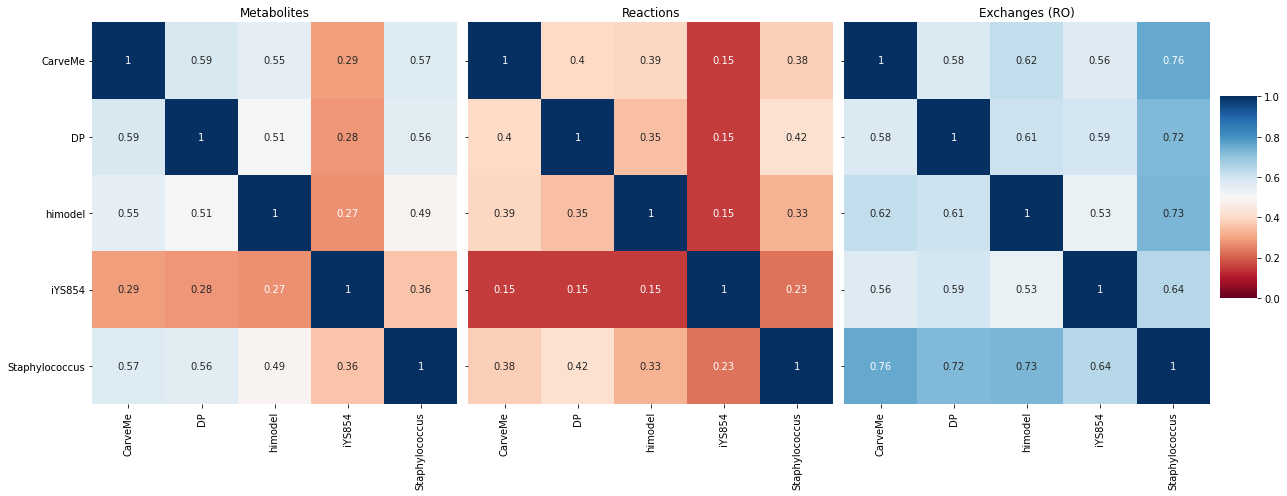

In [26]:
fig = jacard_index_similarity_heatmap(*jaccard_similarity_matrices(models))